# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [87]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = "cape town"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [88]:
response = requests.get(query_url + "boston").json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.3584,
        "lon": -71.0598
    },
    "dt": 1620191759,
    "id": 4930956,
    "main": {
        "feels_like": 46.38,
        "humidity": 87,
        "pressure": 1011,
        "temp": 48.81,
        "temp_max": 51.01,
        "temp_min": 46.4
    },
    "name": "Boston",
    "sys": {
        "country": "US",
        "id": 3486,
        "sunrise": 1620207232,
        "sunset": 1620258473,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 5.75
    }
}


In [89]:
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
counter = 0

print("Beginning Data Retrieval")
print("-----------------------")

for city in cities:

    weather_response = requests.get(query_url + city).json()
    #import pdb; pdb.set_trace()
    try:      
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        clouds.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        print("Processed City " + str(counter) + " " + city)
    except:
        print("City not found: " + str(counter) + " " + city)
    counter += 1
print(len(weather_response))
print("-----------------------")
print("Ending Data Retrieval")

Beginning Data Retrieval
-----------------------
Processed City 0 nyurba
Processed City 1 lompoc
Processed City 2 rikitea
Processed City 3 ylojarvi
Processed City 4 qaanaaq
Processed City 5 puerto ayora
Processed City 6 semirom
Processed City 7 tungor
Processed City 8 tuatapere
Processed City 9 mataura
Processed City 10 kavieng
Processed City 11 nanortalik
Processed City 12 ziro
Processed City 13 kapaa
Processed City 14 aswan
Processed City 15 new norfolk
Processed City 16 safaga
Processed City 17 ribeira grande
Processed City 18 vila velha
Processed City 19 severo-kurilsk
Processed City 20 bonito
Processed City 21 hilo
Processed City 22 georgetown
Processed City 23 albany
Processed City 24 punta arenas
Processed City 25 tukrah
Processed City 26 acarau
Processed City 27 ravar
Processed City 28 mocuba
Processed City 29 vaini
Processed City 30 lavrentiya
Processed City 31 cape town
Processed City 32 kalmunai
City not found: 33 saleaula
Processed City 34 sun prairie
Processed City 35 yell

Processed City 293 mount gambier
Processed City 294 seoul
Processed City 295 devils lake
City not found: 296 sentyabrskiy
Processed City 297 yerbogachen
Processed City 298 christchurch
Processed City 299 rabo de peixe
Processed City 300 faanui
Processed City 301 namatanai
Processed City 302 rio gallegos
Processed City 303 phangnga
Processed City 304 grindavik
Processed City 305 susa
Processed City 306 waipawa
Processed City 307 richards bay
City not found: 308 utiroa
Processed City 309 komsomolskiy
Processed City 310 bibiani
Processed City 311 kollo
Processed City 312 garhi khairo
Processed City 313 kichera
Processed City 314 muzhi
Processed City 315 alappuzha
Processed City 316 barmer
Processed City 317 ambur
Processed City 318 manaus
Processed City 319 svetlaya
Processed City 320 naze
Processed City 321 sioux lookout
Processed City 322 sakakah
Processed City 323 nome
City not found: 324 chaochou
Processed City 325 yongan
Processed City 326 mount isa
City not found: 327 marcona
City n

Processed City 583 romitan
Processed City 584 san cristobal
Processed City 585 wattegama
Processed City 586 stepnyak
Processed City 587 kozhevnikovo
Processed City 588 camacupa
Processed City 589 umm kaddadah
Processed City 590 manggar
Processed City 591 vostok
Processed City 592 hornepayne
Processed City 593 baruun-urt
Processed City 594 auki
Processed City 595 touros
Processed City 596 formosa
Processed City 597 blyth
City not found: 598 karaul
Processed City 599 crixas
Processed City 600 tessalit
Processed City 601 marsa matruh
Processed City 602 north bend
Processed City 603 kaabong
Processed City 604 portobelo
Processed City 605 bilma
Processed City 606 polignano a mare
Processed City 607 gua musang
Processed City 608 phetchabun
Processed City 609 sibu
Processed City 610 jacareacanga
Processed City 611 stephenville
13
-----------------------
Ending Data Retrieval


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
city_df = pd.DataFrame({"City": city_name,
                       "Lat": lat,
                       "Lng": lon,
                       "Max Temp": max_temp,
                       "Humidity": humidity,
                       "Cloudiness": clouds,
                       "Wind Speed": wind_speed,
                       "Country": country,
                       "Date": date
                       })
city_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [91]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nyurba,63.2842,118.3319,50.32,64,60,6.73,RU,1620191762
1,Lompoc,34.6391,-120.4579,53.01,87,2,4.56,US,1620191763
2,Rikitea,-23.1203,-134.9692,77.32,82,100,5.70,PF,1620191763
3,Ylöjärvi,61.5563,23.5961,39.99,56,0,11.50,FI,1620191764
4,Qaanaaq,77.4840,-69.3632,23.99,68,100,6.38,GL,1620191764


In [92]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.939917,22.490699,61.716613,68.967742,52.702509,7.370000,1.620192e+09
std,33.019579,89.279854,18.275279,22.792067,38.033686,4.880812,9.522398e+01
min,-54.800000,-175.200000,13.840000,1.000000,0.000000,0.250000,1.620191e+09
25%,-5.237225,-57.313950,48.200000,55.000000,19.250000,3.695000,1.620192e+09
50%,29.289000,28.640400,63.800000,74.000000,54.000000,5.990000,1.620192e+09
75%,48.328275,95.892200,76.042500,87.000000,90.000000,10.285000,1.620192e+09
max,78.218600,178.416700,103.350000,100.000000,100.000000,41.430000,1.620192e+09


In [111]:
city_df.to_csv("../output_data/output_data_file")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

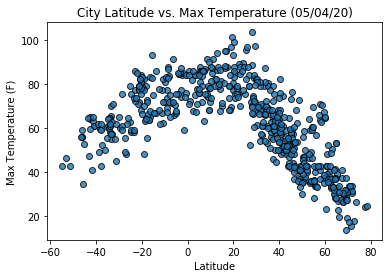

In [94]:
# Temp (F) vs. Lat
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker='o', edgecolor="black", linewidths=1, alpha=0.8, 
            label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/04/20)")
plt.savefig("../output_data/Max_Temp.png")

## Latitude vs. Humidity Plot

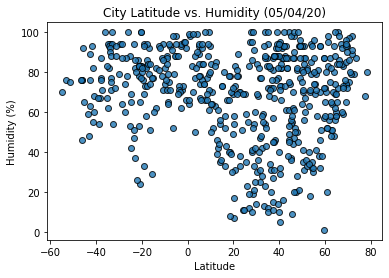

In [99]:
# Humidity vs. Lat
plt.scatter(city_df["Lat"], city_df["Humidity"], marker='o', edgecolor="black", linewidths=1, alpha=0.8, 
            label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/04/20)")
plt.savefig("../output_data/Humidity.png")

## Latitude vs. Cloudiness Plot

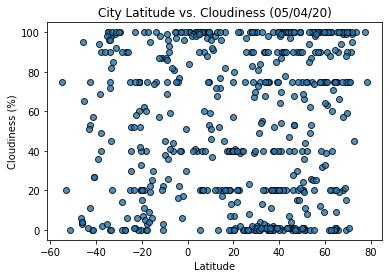

In [100]:
# Cloudiness vs. Lat
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker='o', edgecolor="black", linewidths=1, alpha=0.8, 
            label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (05/04/20)")
plt.savefig("../output_data/Cloudiness.png")

## Latitude vs. Wind Speed Plot

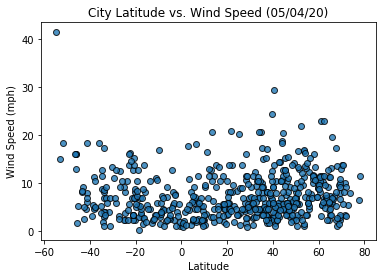

In [101]:
# Wind Speed vs. Lat
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker='o', edgecolor="black", linewidths=1, alpha=0.8, 
            label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (05/04/20)")
plt.savefig("../output_data/Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [102]:
# Use a loc function to define the Northern and Southern hemispheres by being greater or less than 0
north_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) > 0 , :]
south_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0 , :]

The r-squared is: 0.7208570209288773
The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.


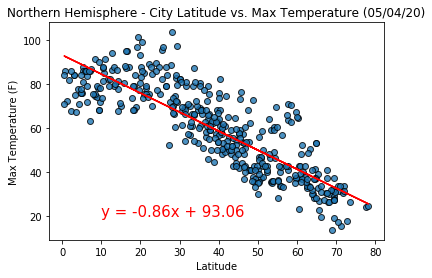

In [103]:
# Temp (F) vs. Lat Linear Regression
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (05/04/20)")
plt.savefig("../output_data/North - Max Temp.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.471169361292943
The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.


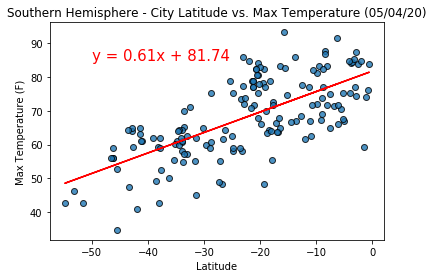

In [104]:
# Temp (F) vs. Lat Linear Regression
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (05/04/20)")
plt.savefig("../output_data/South - Max Temp.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006729486179107223
The regression shows that there is no real correlation between humidity and latitude in the Northern Hemisphere.


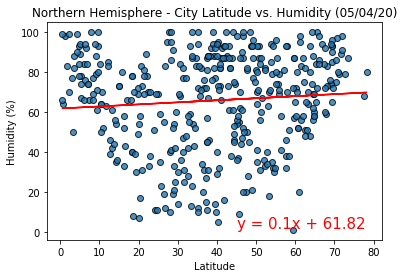

In [105]:
# Hum (%) vs. Lat Linear Regression
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,2),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (05/04/20)")
plt.savefig("../output_data/North - Humidity.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows that there is no real correlation between humidity and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0138012226714253
The regression shows there is no real correlation between humidity and latitude in the Southern Hemisphere.


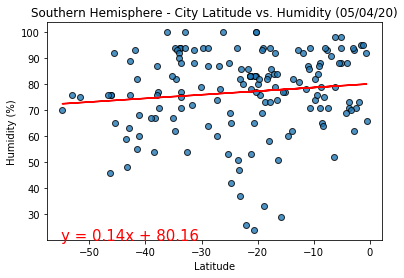

In [106]:
# Hum (%) vs. Lat Linear Regression
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (05/04/20)")
plt.savefig("../output_data/South - Humidity.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows there is no real correlation between humidity and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003807856580966135
The regression shows that there is no real correlation between cloudiness and latitude in the Northern Hemisphere.


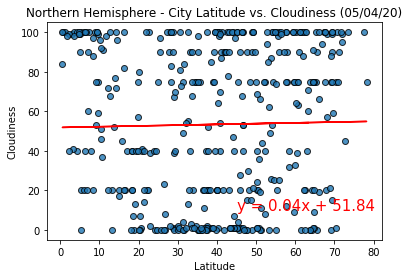

In [107]:
# Cloudiness vs. Lat Linear Regression
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (05/04/20)")
plt.savefig("../output_data/North - Clouds.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows that there is no real correlation between cloudiness and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013382324871688058
The regression shows there is a slight positive correlation between cloudiness and latitude in the Southern Hemisphere.


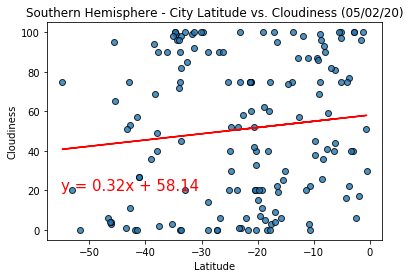

In [108]:
# Cloudiness vs. Lat Linear Regression
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (05/02/20)")
plt.savefig("../output_data/South - Clouds.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows there is a slight positive correlation between cloudiness and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03156651382364666
The regression shows that there is no real correlation between wind speed and latitude in the Northern Hemisphere.


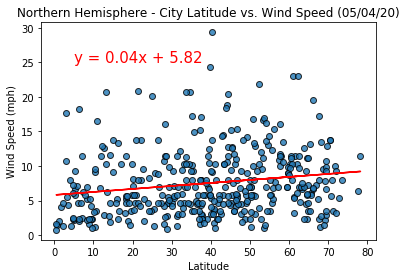

In [109]:
# Wind speed (mph) vs. Lat Linear Regression
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (05/04/20)")
plt.savefig("../output_data/North - Winds.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows that there is no real correlation between wind speed and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15114087813423457
The regression shows there is no real correlation between wind speed and latitude in the Southern Hemisphere.


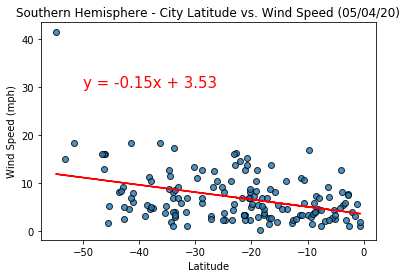

In [110]:
# Wind speed (mph) vs. Lat Linear Regression
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (05/04/20)")
plt.savefig("../output_data/South - Winds.png")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows there is no real correlation between wind speed and latitude in the Southern Hemisphere.")
plt.show()